<a href="https://colab.research.google.com/github/thakurnimesh107/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing the dataset
Dataset = pd.read_csv("/content/drive/MyDrive/Almabetter Machine Learning Capstone Yes bank stock prediction/data_YesBank_StockPrices.csv")


#**Description Of Data**


In [ ]:
# Here showing in Dataset the Upper rows by using head() method 
Dataset.head().T


,0,1,2,3,4
Date,Jul-05,Aug-05,Sep-05,Oct-05,Nov-05
Open,13.0,12.58,13.48,13.2,13.35
High,14.0,14.88,14.87,14.47,13.88
Low,11.25,12.55,12.27,12.4,12.88
Close,12.46,13.42,13.3,12.99,13.41


In [ ]:
# Here showing in Dataset the Last Five rows by using tail() method
Dataset.tail().T


,180,181,182,183,184
Date,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20
Open,25.6,12.0,14.3,13.3,12.41
High,28.3,17.16,15.34,14.01,14.9
Low,11.1,11.85,12.75,12.11,12.21
Close,11.95,14.37,13.15,12.42,14.67


In [ ]:
Dataset.describe()


,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


# **There are multiple variable in the dataset - Date, Open, High and close The columns Open and Close represent the starting and final price**.
- **The High, Low variable are represent the maximum and minimum**.


In [ ]:
list(Dataset.columns)

['Date', 'Open', 'High', 'Low', 'Close']

In [ ]:
# Find out the size of the play store data csv by using shape function
Dataset.shape


(185, 5)

Dataset we have 185 rows and 5 column. Here our dependent variable is Close and Independent variable is Open, High and Low
Date :- It denotes the month and year of the for a particular price.

Open :- Open means the price at which a stock started trading that month.

High :- refers to the maximum price that month.

Low :- refers to the minimum price that month.

Close :- refers to the final trading price for that month, which we have to predict using regression



# **Data Cleaning**

In [ ]:
#Looking for missing values
Dataset.isnull().sum().sum()


0

No missing values in dataset. Here our dataset in no nan values

In [ ]:
#Looking for duplicates in dataset

len(Dataset[Dataset.duplicated()])

0

Do not have any duplicates in dataset

### Data Type Change :-

The Given Date in data is of format MMM-YY is converted to proper date of YYYY-MM-DD.
Since, Date column has dtype as object we've to convert it into datetime format



In [ ]:
# converting 'Date' into datetime - YYYY-MM-DD
# required the changing data type of date 
 
from datetime import datetime
Dataset['Date'] = Dataset['Date'].apply(lambda x : datetime.strptime(x, '%b-%y'))


In [ ]:
#check dtype of date now
Dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


Format and data type of date feature changed into datetime.

# **Checking the Outlier**


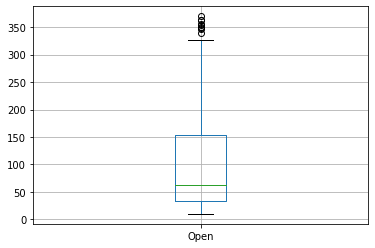

In [ ]:
Dataset.boxplot('Open')

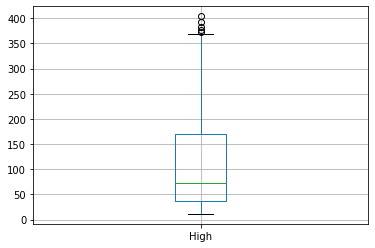

In [ ]:
Dataset.boxplot('High')


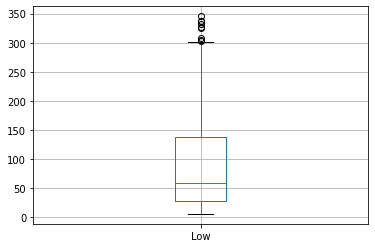

In [ ]:
Dataset.boxplot('Low')

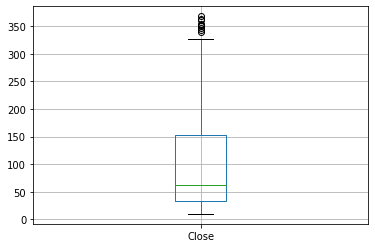

In [ ]:
Dataset.boxplot('Close')

###Data preprocessing finished. Dataset is clean and ready for exploratory data analysis

# **Exploratory Data Analysis**

### **Visualising the data**

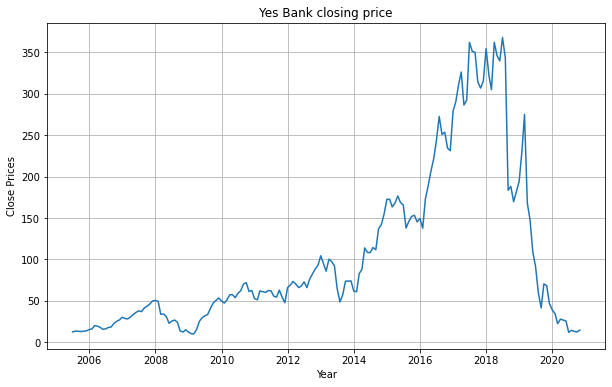

In [ ]:
#plotting close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Close Prices')
plt.plot(Dataset['Date'], Dataset['Close'])
plt.title('Yes Bank closing price')
plt.show()


As seen in above plot the trend is increasing from 2009 to 2018 but after that the trend decreases. This is because of the fraud case of involving Rana Kapoor

Closing price of stock price is always important so i take close price as dependent variable



# **Dependent variable of close price of stock**

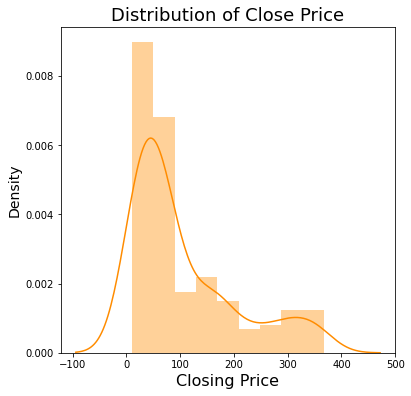

In [ ]:
# depndent variable is 'Close'
# Normal Distribution

plt.figure(figsize = (6,6))
sns.distplot(Dataset['Close'], color = 'DarkOrange')
plt.title('Distribution of Close Price', fontsize=18)
plt.xlabel('Closing Price', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()


It is Right Skewed Distirbution

--To make it normal distribution apply log transformation

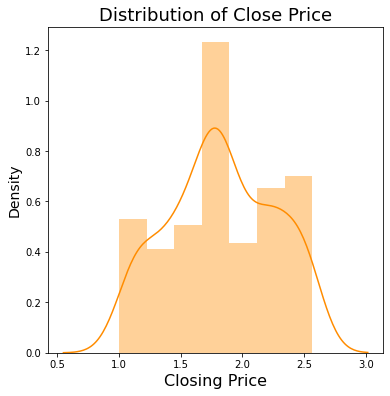

In [ ]:
# Distribution plot of closing price For applying log transformation

plt.figure(figsize = (6,6))
sns.distplot(np.log10(Dataset['Close']), color = 'DarkOrange')
plt.title('Distribution of Close Price', fontsize=18)
plt.xlabel('Closing Price', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()


After log transformation, distribution of closing price is more normal

# **Independent Variable Open , High and Low price of stock**


 **Plotting distribution for numerical Features**

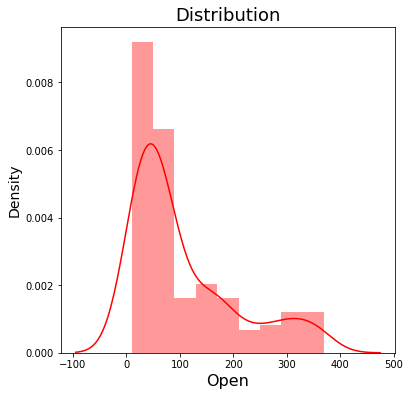

In [ ]:
# ploting for Distribution of 'open' Feature

plt.figure(figsize = (6,6))
sns.distplot(Dataset['Open'], color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Open', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()


It looks for numerical features are rightly skewed.

Apply log transformation to make normal

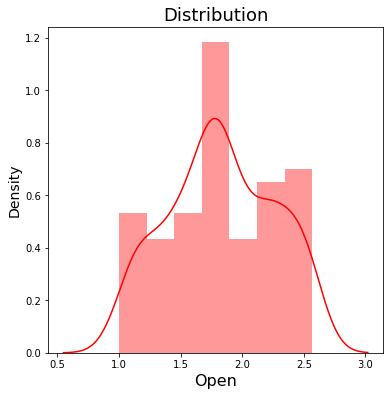

In [ ]:
# log transformation for 'open' feature

plt.figure(figsize = (6,6))
sns.distplot(np.log10(Dataset['Open']), color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Open', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()


It looks like Normally Distributed of open Feature

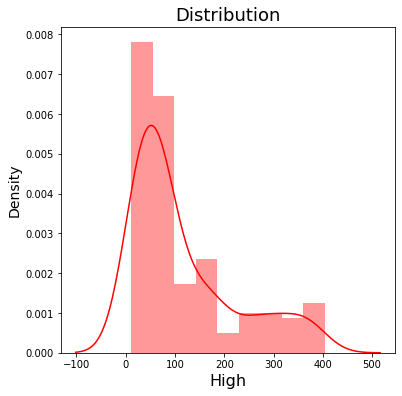

In [ ]:
# ploting for Distribution of 'high' Feature

plt.figure(figsize = (6,6))
sns.distplot(Dataset['High'], color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('High', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()


It looks for numerical features are rightly skewed.

Apply log transformation to make normal.



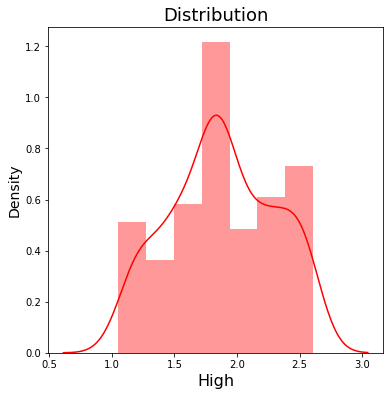

In [ ]:
# Log Transformation of 'High' Feature

plt.figure(figsize = (6,6))
sns.distplot(np.log10(Dataset['High']), color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('High', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()


It looks like Normally Distributed of High Feature



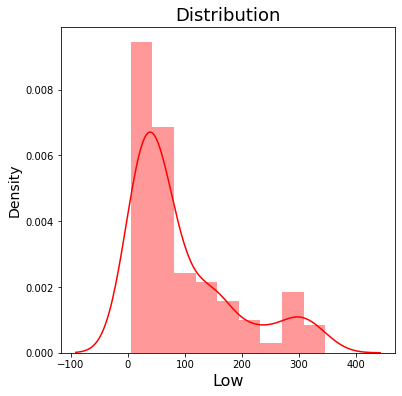

In [ ]:
# for Normal Distribution
# ploting for Distribution of 'Low' Feature

plt.figure(figsize = (6,6))
sns.distplot(Dataset['Low'], color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Low', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

It looks for numerical features are rightly skewed.

Apply log transformation to make normal.

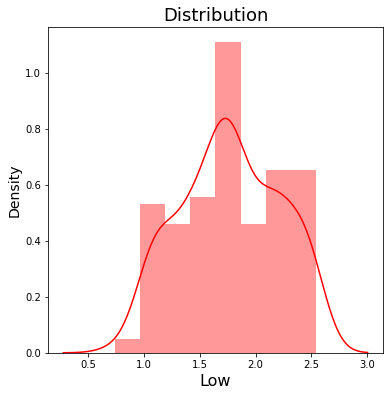

In [ ]:
# Log Transformation of 'low' feature 
plt.figure(figsize = (6,6))
sns.distplot(np.log10(Dataset['Low']), color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Low', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()


It looks like Normally Distributed of Low Feature

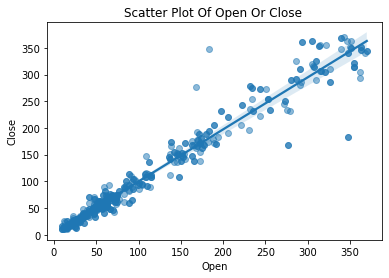

In [ ]:
# Now find out the realation between the Dependent Variable and independent Variable
# scatter plot with Best Fit line

plt.scatter(Dataset['Close'], Dataset['Open'], alpha=0.5)
plt.title('Scatter Plot Of Open Or Close ')
plt.xlabel('Open')
plt.ylabel('Class')
sns.regplot(x ='Open', y = 'Close', data= Dataset)
plt.show()

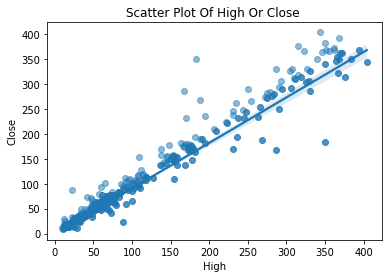

In [ ]:
plt.scatter(Dataset['Close'], Dataset['High'], alpha=0.5)
plt.title('Scatter Plot Of High Or Close ')
plt.xlabel('Open')
plt.ylabel('Class')
sns.regplot(x ='High', y = 'Close', data= Dataset)
plt.show()


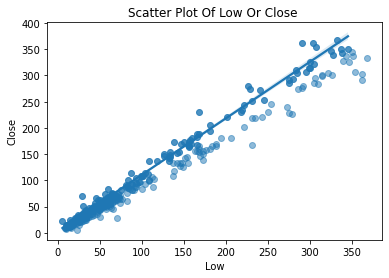

In [ ]:
plt.scatter(Dataset['Close'], Dataset['Low'], alpha=0.5)
plt.title('Scatter Plot Of Low Or Close ')
plt.xlabel('Low')
plt.ylabel('Class')
sns.regplot(x ='Low', y = 'Close', data= Dataset)
plt.show()


# **Correlation**

### **Now, we will see the correlation between all the features in our data set**


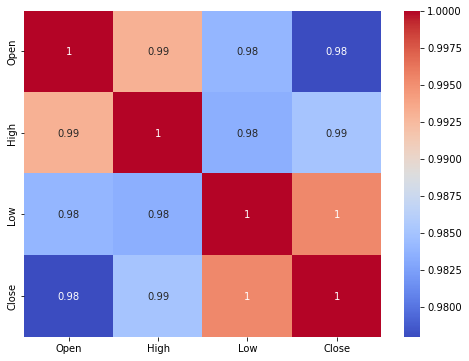

In [ ]:
# let's find out correlation with Heatmap
# correlation
plt.figure(figsize=(8,6))
correlation = Dataset.corr()
sns.heatmap(abs(correlation), annot = True, cmap='coolwarm')


Here, all variables shows the highest correlation among them



In [ ]:
# multicorrelinearity
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(X):

  # calculating VIF
  vif =pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X. shape[1])]

  return(vif)


In [ ]:
cal_vif(Dataset[[i for i in Dataset.describe().columns if i not in ['Date', 'Close']]])


,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


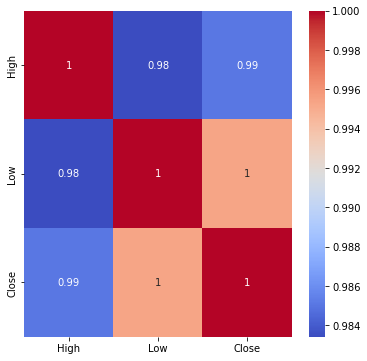

In [ ]:
# after drop the oepn feture from the VIF matrix
# Correaltion of heatmap

plt.figure(figsize=(6,6))
sns.heatmap(Dataset[['High','Low','Close']].corr(), annot= True, cmap= 'coolwarm')
plt.show()

We have dropped 3 features from our dataset because it can effect our model efficiency but neglecting high VIF is far more dangerous than dropping features.

So, we preferred to drop the features and move forward with the Low Variable.

